In [68]:
# import sys
# !{sys.executable} -m pip install pandas

In [33]:
import pandas as pd

In [34]:
df = pd.read_csv('https://data.cityofnewyork.us/resource/bug8-9f3g.csv')

In [35]:
df.head()

,company_name,company_contact,company_email,company_phone,address,city,state,zip,industry,industry_descr,...,savings_from_beginning,borough,latitude,longitude,community_board,council_district,census_tract,bin,bbl,nta
0,1 State Street,David Neiburg,eskoblo@energyspec.com,7186779077,1114 Avenue J,Brooklyn,NY,11230,Commercial,35 story building,...,349.78,Brooklyn,40.624784,-73.964920,314.0,44.0,534.0,3179818.0,3.067130e+09,Midwood
1,100 Church LLC,Edward A. Carroll,NaN,2125663000,100 Church Street,NY,NY,10007,Commercial,21 Floors,...,4423698.05,New York,40.712968,-74.009490,101.0,1.0,21.0,1001409.0,1.001250e+09,SoHo-TriBeCa-Civic Center-Little Italy
2,100 Wall Investments,Jerry Branam,NaN,2122487160,96 Wall Street,New York,NY,10005,Landlord,NaN,...,1814542.62,New York,40.705052,-74.007199,101.0,1.0,7.0,1000875.0,1.000380e+09,Battery Park City-Lower Manhattan
3,1-10 Bush Terminal Owner LP,Andrew Kimball,akimball@industrycity.com,3474178429,"220 36th St, Suite 2A",Brooklyn,NY,11232,Landlord,Special Eligible Premises for eligible businesses,...,6755.31,Brooklyn,40.656061,-74.007334,307.0,38.0,2.0,3398687.0,3.006950e+09,Sunset Park West
4,"120 Broadway Acquisitions JV, LLC (Ldmk)",Carl Letich,clettich@silvprop.com,2124064020,120 Broadway,New York,NY,10271,Commercial,NaN,...,3293055.08,New York,40.708546,-74.011041,101.0,1.0,7.0,1001026.0,1.000478e+09,Battery Park City-Lower Manhattan


How many different companies are represented in the data set?

In [36]:
df.company_name.nunique()

439

What is the total number of jobs created for businesses in Queens?

In [37]:
df.job_created.sum()

149.0

How many different unique email domains names are there in the data set?

In [38]:
import re

In [39]:
regex = re.compile(r"^.+@(.+)\.[\w]+$")
domains = df.company_email.dropna().apply(regex.findall)

In [40]:
len(set([d[0] for d in domains if len(d)>0]))

355

Considering only NTAs with at least 5 listed businesses, what is the average total savings and the total jobs created for each NTA?

In [41]:
df.isna().sum()

company_name                0
company_contact             0
company_email              17
company_phone               0
address                     0
city                        0
state                       0
zip                         0
industry                    0
industry_descr             16
company_type                0
current_fulltime            4
job_created               439
job_retain                436
effective_date              0
total_savings               0
savings_from_beginning      0
borough                     0
latitude                   41
longitude                  41
community_board            41
council_district           41
census_tract               41
bin                        49
bbl                        49
nta                        41
dtype: int64

In [42]:
NTAs = df[['nta', 'company_name']].groupby(['nta']).count()

In [45]:
results = df[df.nta.isin(NTAs[(NTAs.company_name>=5)].index)][['nta', 'total_savings','job_created']].groupby(['nta']).mean()
results_1 = df[df.nta.isin(NTAs[(NTAs.company_name>=5)].index)][['nta', 'total_savings','job_created']].dropna().groupby(['nta']).mean()

Save your result for the previous question as a CSV file.

In [46]:
results.to_csv('out.csv')

In [47]:
print(pd.__version__)
print(re.__version__)

1.3.4
2.2.1


scatter plot of jobs created versus average savings. Use both a standard and a logarithmic scale for the average savings.

In [48]:
import matplotlib.pyplot as plt
import numpy as np


In [49]:
results_1 #droped null values

,total_savings,job_created
nta,,
Bushwick South,35384.760000,10.000000
College Point,54127.140000,2.000000
East New York,10646.470000,15.000000
Hunts Point,181579.240000,12.000000
Maspeth,52.330000,10.000000
Mott Haven-Port Morris,1026.103333,3.333333
Steinway,2056.800000,20.000000


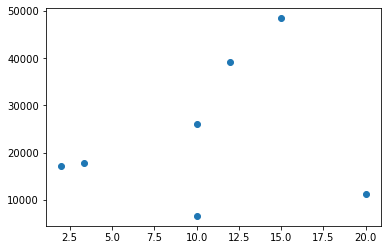

In [55]:
x = results.job_created
y = results.total_savings
plt.scatter(x, y)
plt.show()



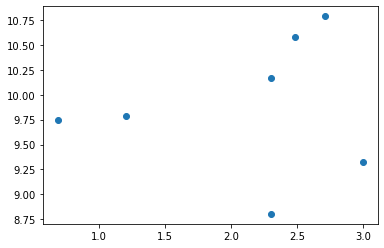

In [56]:
x_log = np.log(results.job_created, dtype='float64')
y_log = np.log(results.total_savings, dtype='float64')
plt.scatter(x_log, y_log)
plt.show()



histogram of the log of the average total savings.



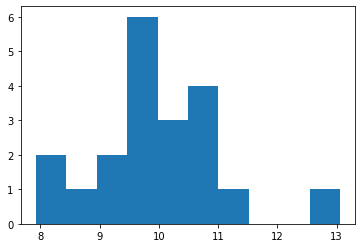

In [57]:
plt.hist(y_log)
plt.show()

line plot of the total jobs created for each month.

In [63]:
jobs = df[['effective_date','job_created']].groupby(['effective_date']).sum()

In [64]:
jobs.head()

,job_created
effective_date,
1993-02-05T00:00:00.000,15.0
2004-03-05T00:00:00.000,10.0
2005-02-03T00:00:00.000,12.0
2005-03-04T00:00:00.000,0.0
2005-06-30T00:00:00.000,0.0


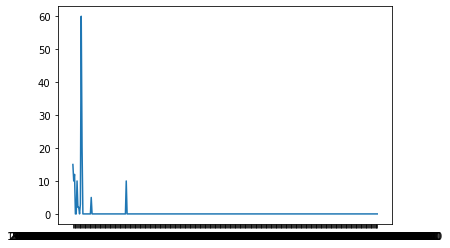

In [65]:
plt.plot(jobs)